<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time.



## Questions for Analysis in the EDA Section

## Question(1) Which genres are most popular from year to year?
## Question (2) When was the highest vote counts?
## Question (3) How many films produce in each year?
## Question (4)  What kinds of properties are associated with movies that have high revenues?

In [297]:
#importing libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
# Data Wrangling

In [298]:
# reading dataset
df = pd.read_csv('tmdb-movies.csv')

In [299]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [300]:
# show what the data set consits of (column,rows)
df.shape

(10866, 21)

# Data Cleaning

In [301]:
#specify which data we will not need to drop it
delete_column=[ 'imdb_id','id', 'homepage', 'keywords', 'overview','tagline']

#droping the columns
df.drop(delete_column, axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [302]:
#check for features has missing values
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [303]:
 # delete rows that have Nan values
df.dropna(axis = 0, inplace = True)

In [304]:


#checking if there is any Nan values supposed to be false
df.isnull().sum().any()

False

In [305]:
df.shape

(9773, 15)

In [306]:
#chcecking if there is any duplicated files 
df.duplicated().sum()

1

In [307]:
#removing duplicated files 
df.drop_duplicates(inplace=True)
#checking if there is any duplicated values supposed to be false
df.duplicated().sum().any()

False

In [308]:
df.shape

(9772, 15)

In [309]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


## changing data type

In [310]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [311]:
#converting type of release_date to date time 
df['release_date'] = pd.to_datetime(df['release_date'])
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


## Adding new columns to Dataset 

In [312]:
#creating new columns
df['genre']=df.genres.str.split(pat='|',expand=True)[0]
df['director']=df.director.str.split(pat='|',expand=True)[0]
df['film_star']=df.cast.str.split(pat='|',expand=True)[0]
df['net_gain'] = df.revenue_adj - df.budget_adj
#drop gneners because it now unuseful 
df.drop(['genres'],axis= 1, inplace = True)
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre,film_star,net_gain
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,1.254446e+09


In [313]:
df.shape

(9772, 17)

In [314]:
# as we see we have zeors in budget and revenue in dataset so we will drop them  
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_gain
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9.772000e+03
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07,3.763710e+07
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08,1.314756e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00,0.000000e+00
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07,2.029698e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [315]:
#repleacing any zeros and drop them
df_films = df.replace({'budget': 0, 'budget_adj': 0,'revenue': 0,'revenue_adj': 0}, pd.np.nan)
df_films.dropna(axis = 0, inplace = True)
#df_movies['revenue'].describe(), df_movies.shape

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_18948/3745933332.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df_films = df.replace({'budget': 0, 'budget_adj': 0,'revenue': 0,'revenue_adj': 0}, pd.np.nan)


In [316]:
df_films.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_gain
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3.805000e+03
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08,9.399617e+07
std,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08,1.950332e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07,-1.420000e+06
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07,2.851334e+07
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08,1.090266e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [317]:
df_films.shape

(3805, 17)

<a id='eda'></a>
## Exploratory Data Analysis

## Research Question 1 (which genres are most popular from year to year?)

In [318]:
#creating function to get most popular genres in each year specified by the user
def popularity_genre():
    while True:
        
        year = int(input('Enter the year you want to filter by it (1960-2015)'))
        if(year> 1959 and year<=2015):
            highest_popular_year = df.query('release_year == @year')[['genre', 'popularity']]
            highest_popular_genre = highest_popular_year.groupby('genre').mean()
            highest_popular_genre.plot(kind='bar',figsize=(14,6),title="releation between genre and popularity",xlabel='genre of the film',ylabel='popularity of the film')
            #highest_popular_genre.plot(kind='pie',figsize=(14,6),subplots=True)
            
            break        
        else:
            print('Invalid data please check the year you have enterd')

Enter the year you want to filter by it (1960-2015)2005


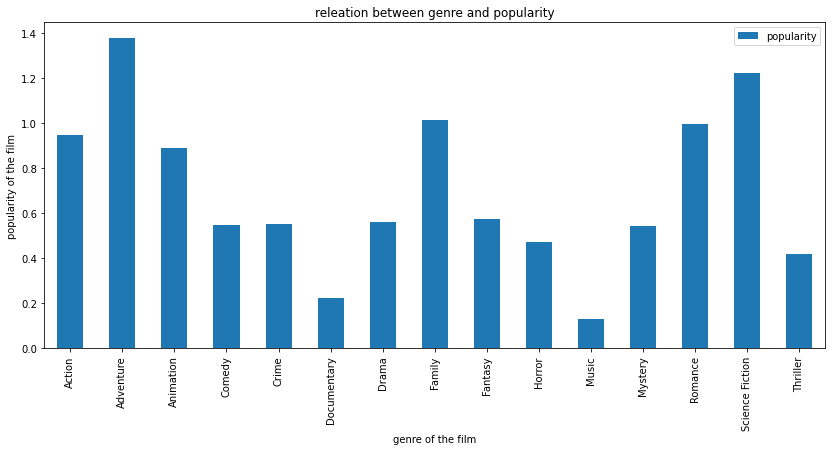

In [319]:
popularity_genre()

## Question 2 (When was the highest vote counts?)

In [320]:
highest_average_voting=df.groupby('release_year')['vote_count'].mean().sort_values(ascending=False)

In [321]:
highest_average_voting.head()

release_year
2013    374.901235
2012    364.471888
2015    323.801075
2014    322.585827
2004    308.474308
Name: vote_count, dtype: float64

<AxesSubplot:title={'center':'releation between year and voting count'}, xlabel='release_year', ylabel='voting caount'>

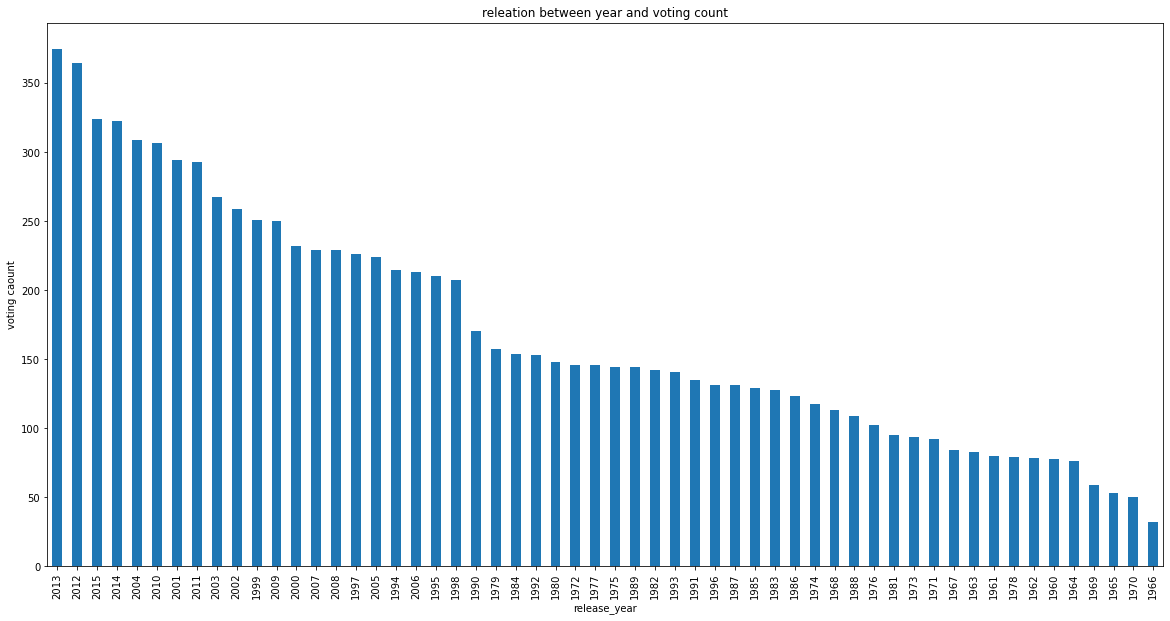

In [322]:
#ploting the releation
highest_average_voting.plot(kind='bar', title='releation between year and voting count',figsize=(20,10),xlabel='release_year',ylabel='voting caount')

### as we see 2013 has the highest voting counts

# Question 3 (how many films produce in each year?)

In [323]:
df_number_of_films=df['release_year'].value_counts().sort_values(ascending=False)

In [324]:
df_number_of_films.head()

2014    635
2013    567
2015    558
2012    498
2009    474
Name: release_year, dtype: int64

<AxesSubplot:title={'center':'releation between release year and the number of films produced'}, xlabel='release year', ylabel='number of films produced'>

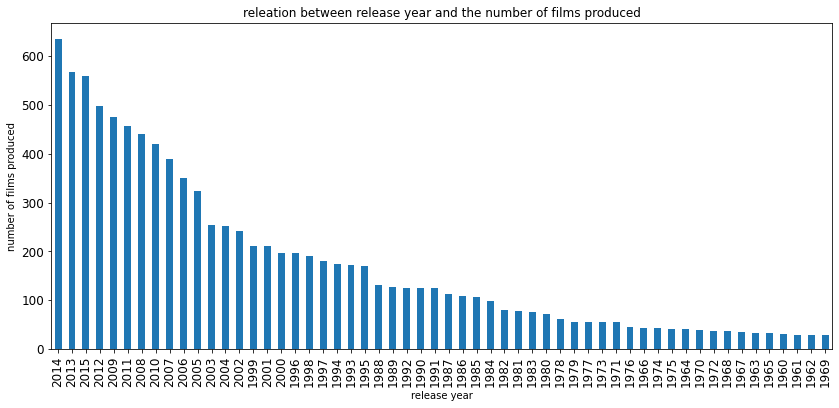

In [325]:
#df_number_of_films.plot
#plt.figure(figsize=(12,6), dpi = 130)
#plt.plot(df_number_of_films)
#plt.show()

df_number_of_films.plot(kind='bar',figsize=(14,6),xlabel='release year',ylabel='number of films produced', title='releation between release year and the number of films produced',fontsize = 12)
#df_number_of_films.plot.scatter(x='',y='',figsize=(12,6))

### we get that 2014 has the most produced films

# Question 4 ( What kinds of properties are associated with movies that have high revenues?)

## releation (1) between genre and revenue

In [326]:
# we grouped data between genre and revenue to make relation between them
df_revenue_genre=df_films.groupby(['genre'], as_index=False)['revenue'].mean()

<AxesSubplot:title={'center':'releation between revenue and the genre of the films'}, xlabel='genre of the film', ylabel='Revenue'>

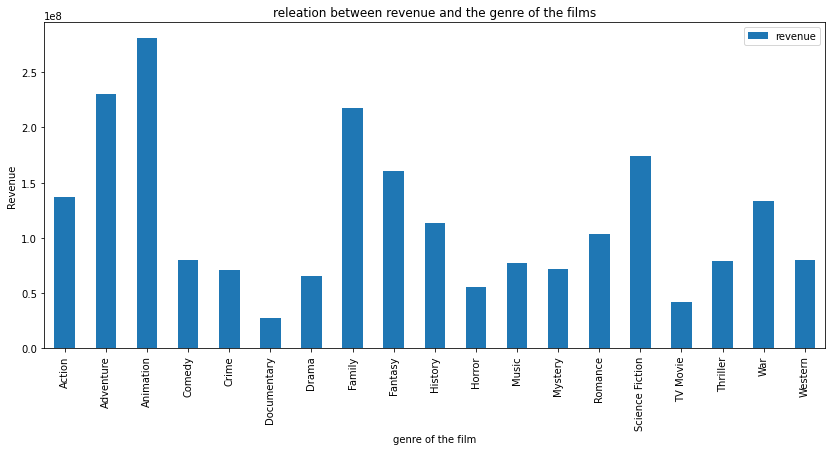

In [327]:
# then plot the relation 
df_revenue_genre.plot(kind='bar',x='genre',figsize=(14,6),xlabel='genre of the film',ylabel='Revenue', title='releation between revenue and the genre of the films')

### so as we see animation has the highest revenues in the data sets.

## relation(2) relation between release year and revenue

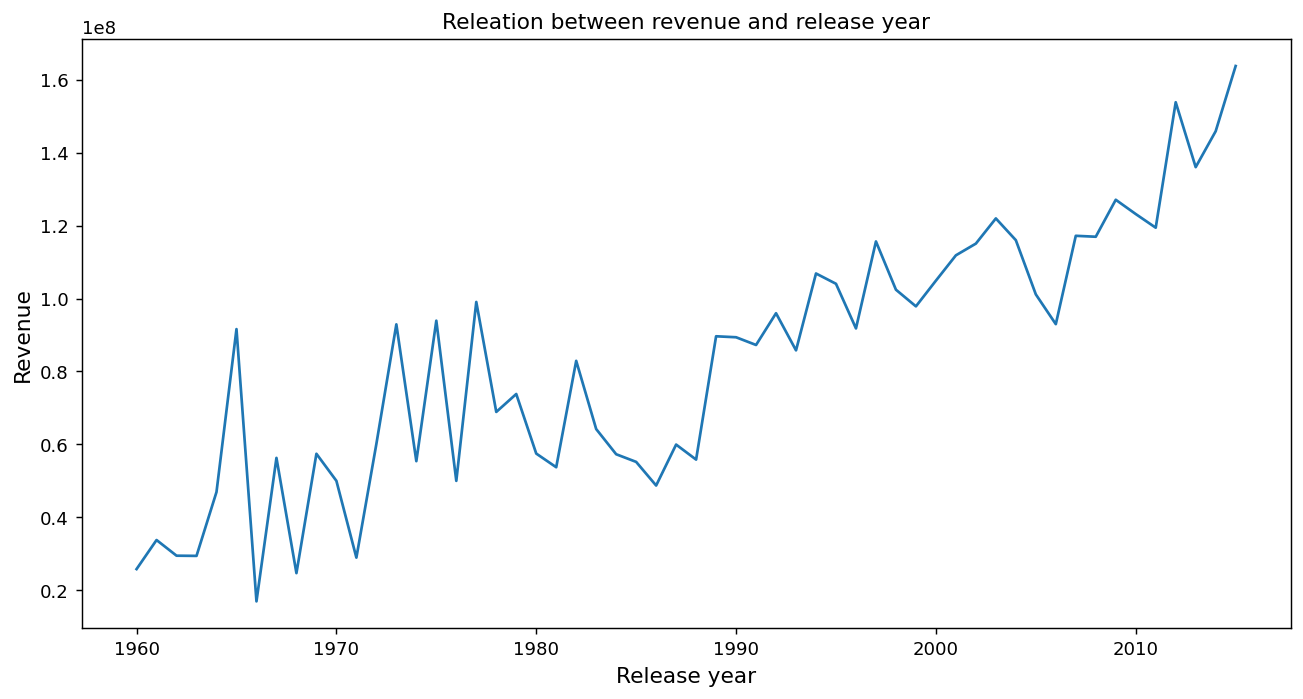

In [328]:
# so we are grouping data by release year and revenue
df_year_revenue = df_films.groupby('release_year')['revenue'].mean()
# plotting the releation 
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release year', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12)
plt.title('Releation between revenue and release year')
plt.plot(df_year_revenue)
plt.show()

### during the time we notice that revenue is increasing 

## releation(3) between revenue and budget

<AxesSubplot:title={'center':'releation between revenue and budget'}, xlabel='revenue', ylabel='budget'>

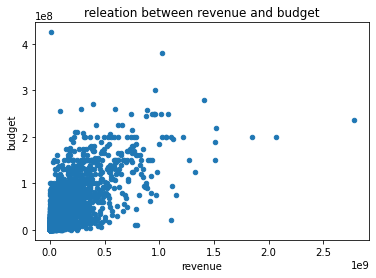

In [329]:
# we make releation between revenue and budget 
df_films.plot.scatter(x='revenue', y='budget',title='releation between revenue and budget')

### so it is not necessary to spend high budget to get high revenue as we see 

## releation (4) between revenue and vote count

<AxesSubplot:title={'center':'releation between revenue and vote count'}, xlabel='revenue', ylabel='vote_count'>

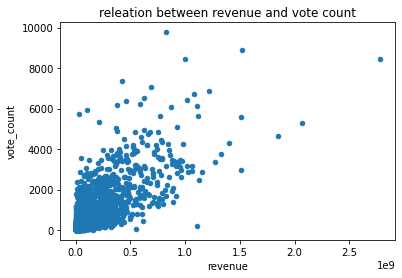

In [330]:
#potting releation between vote count and revenue
df_films.plot.scatter(x='revenue', y='vote_count',title='releation between revenue and vote count')

### so as vote count increase the revenue increase 

## releatiom(5) between revenue and runtime

<AxesSubplot:title={'center':'releation between revenue and runtime'}, xlabel='revenue', ylabel='runtime'>

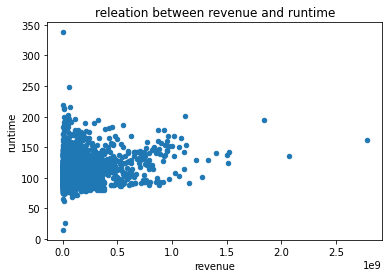

In [331]:
df_films.plot.scatter(x='revenue', y='runtime',title='releation between revenue and runtime')

### as the film has medium time it acheive revenue 

<a id='conclusions'></a>
## Conclusions
Average duration of the movie should be around (100-150) minutes

Movies with high vote counts have higher profit

stay away from producing tv movies becauese it gain low revenue

vote counts affecting in revenue so we must take care about it

revenue did not depend on the budget spend

recomending to produce more in animation and adventure as it get high revenue
## limitation
i had focused on the movie revenue to get the most movies with high revenus but i found many movies with zeros so i had to drop this data and work with the new data frame that has a few data.

actors and directors did not mentioned in dataset enough despite of it is importance in revenue some people can watch film because an actor that they love him .
